In [53]:
#!pip install pycausalimpact
!pip freeze > requirements.txt


# **Causal Impact Analysis : Sales Uplift Analysis for Online Retail** 

## **Import Libraries**

In [4]:
#load libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from causalimpact import CausalImpact 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (24 , 10)
import warnings
warnings.filterwarnings("ignore")


## **Load Data**

In [6]:
df = pd.read_csv('sales_data_with_marketing_intervention.csv')
df.head()

,Unnamed: 0,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign
0,0,2021-01-01,372,58,4,42.01,168.04,False
1,1,2021-01-02,288,61,1,74.71,74.71,False
2,2,2021-01-03,130,24,3,36.74,110.22,False
3,3,2021-01-04,175,20,3,60.98,182.94,False
4,4,2021-01-05,462,37,2,52.84,105.68,False


## **Data Cleaning**

In [8]:
#remove the first column 'Unnamed'
df.drop(columns = ['Unnamed: 0', 'customer_id', 'product_id'], inplace  = True)
df.head()


,date,quantity,unit_price,revenue,marketing_campaign
0,2021-01-01,4,42.01,168.04,False
1,2021-01-02,1,74.71,74.71,False
2,2021-01-03,3,36.74,110.22,False
3,2021-01-04,3,60.98,182.94,False
4,2021-01-05,2,52.84,105.68,False


In [9]:
#check missing values
df.isna().sum()

date                  0
quantity              0
unit_price            0
revenue               0
marketing_campaign    0
dtype: int64

In [10]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                250 non-null    object 
 1   quantity            250 non-null    int64  
 2   unit_price          250 non-null    float64
 3   revenue             250 non-null    float64
 4   marketing_campaign  250 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 8.2+ KB


In [11]:
#change date to datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
print()

             

datetime64[ns]



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                250 non-null    datetime64[ns]
 1   quantity            250 non-null    int64         
 2   unit_price          250 non-null    float64       
 3   revenue             250 non-null    float64       
 4   marketing_campaign  250 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1)
memory usage: 8.2 KB


### **Feature Engineering**

In [14]:
#sort data by date
df.sort_values(by ='date')

,date,quantity,unit_price,revenue,marketing_campaign
0,2021-01-01,4,42.01,168.04,False
1,2021-01-02,1,74.71,74.71,False
2,2021-01-03,3,36.74,110.22,False
3,2021-01-04,3,60.98,182.94,False
4,2021-01-05,2,52.84,105.68,False
...,...,...,...,...,...
245,2021-09-03,14,48.36,677.04,True
246,2021-09-04,13,50.62,658.06,True
247,2021-09-05,12,24.73,296.76,True
248,2021-09-06,12,81.53,978.36,True


In [15]:
#label emcode the marketing campaign
from sklearn.preprocessing import LabelEncoder
#instaniate
la = LabelEncoder()
#fit the model
df['marketing_campaign'] = la.fit_transform(df['marketing_campaign'])

df.tail()

,date,quantity,unit_price,revenue,marketing_campaign
245,2021-09-03,14,48.36,677.04,1
246,2021-09-04,13,50.62,658.06,1
247,2021-09-05,12,24.73,296.76,1
248,2021-09-06,12,81.53,978.36,1
249,2021-09-07,13,72.43,941.59,1


## **Exploratory Data Analysis**

In [17]:
#descrptive analaysis
df.describe()

,date,quantity,unit_price,revenue,marketing_campaign
count,250,250.000000,250.000000,250.000000,250.000000
mean,2021-05-05 12:00:00,4.860000,57.880640,280.358120,0.200000
min,2021-01-01 00:00:00,0.000000,10.570000,0.000000,0.000000
25%,2021-03-04 06:00:00,2.000000,33.675000,74.810000,0.000000
50%,2021-05-05 12:00:00,3.000000,61.665000,177.140000,0.000000
75%,2021-07-06 18:00:00,6.000000,81.440000,329.907500,0.000000
max,2021-09-07 00:00:00,16.000000,99.810000,1572.960000,1.000000
std,NaN,4.352029,26.864545,309.511866,0.400802


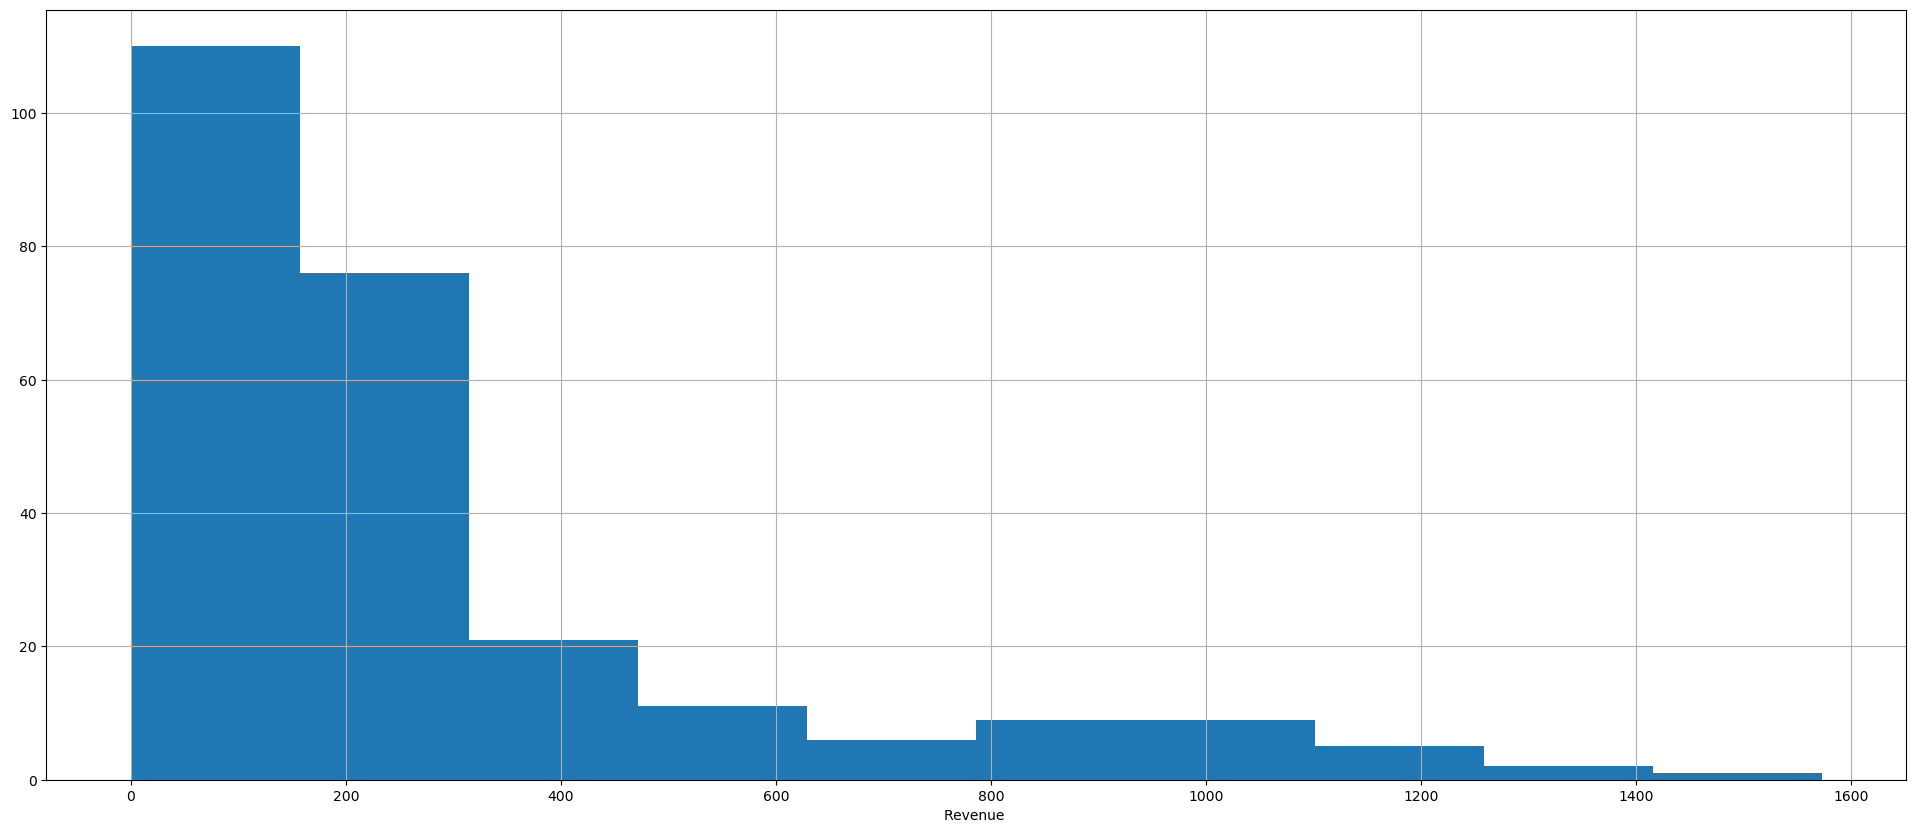

In [18]:
# checking revenue distributin
df['revenue'].hist()
plt.xlabel('Revenue ');

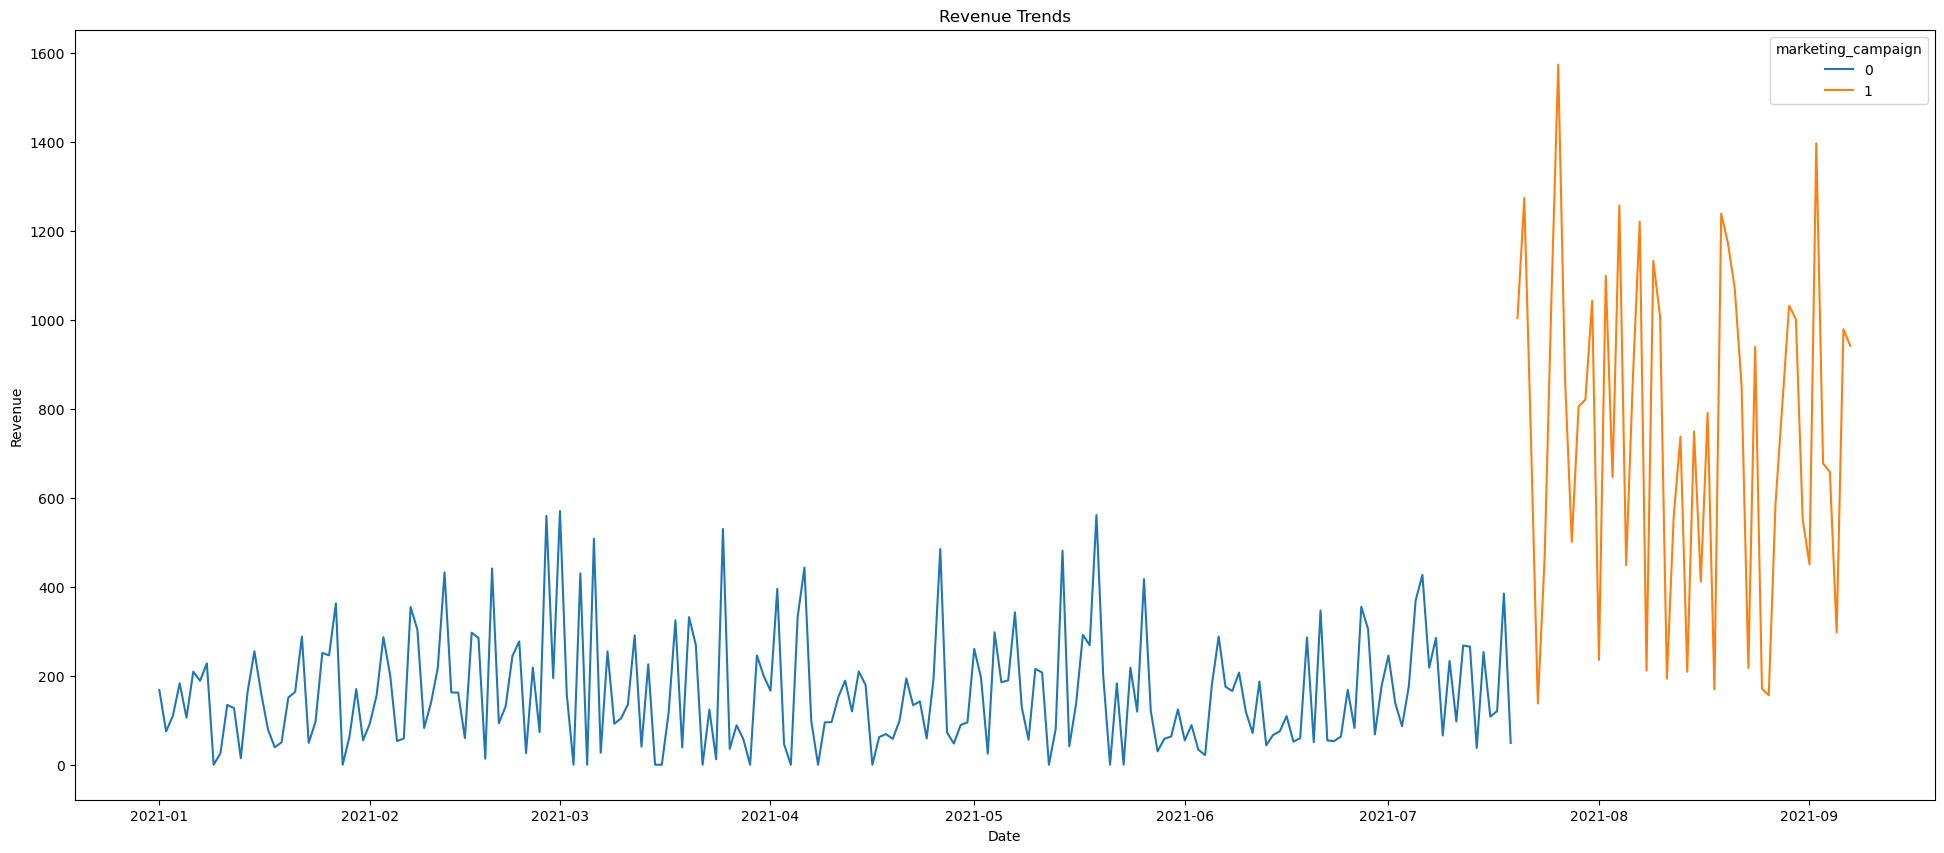

In [19]:
#revenue by date trends
sns.lineplot(data = df, x = 'date', y = 'revenue', hue = 'marketing_campaign' )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Trends')
plt.show()


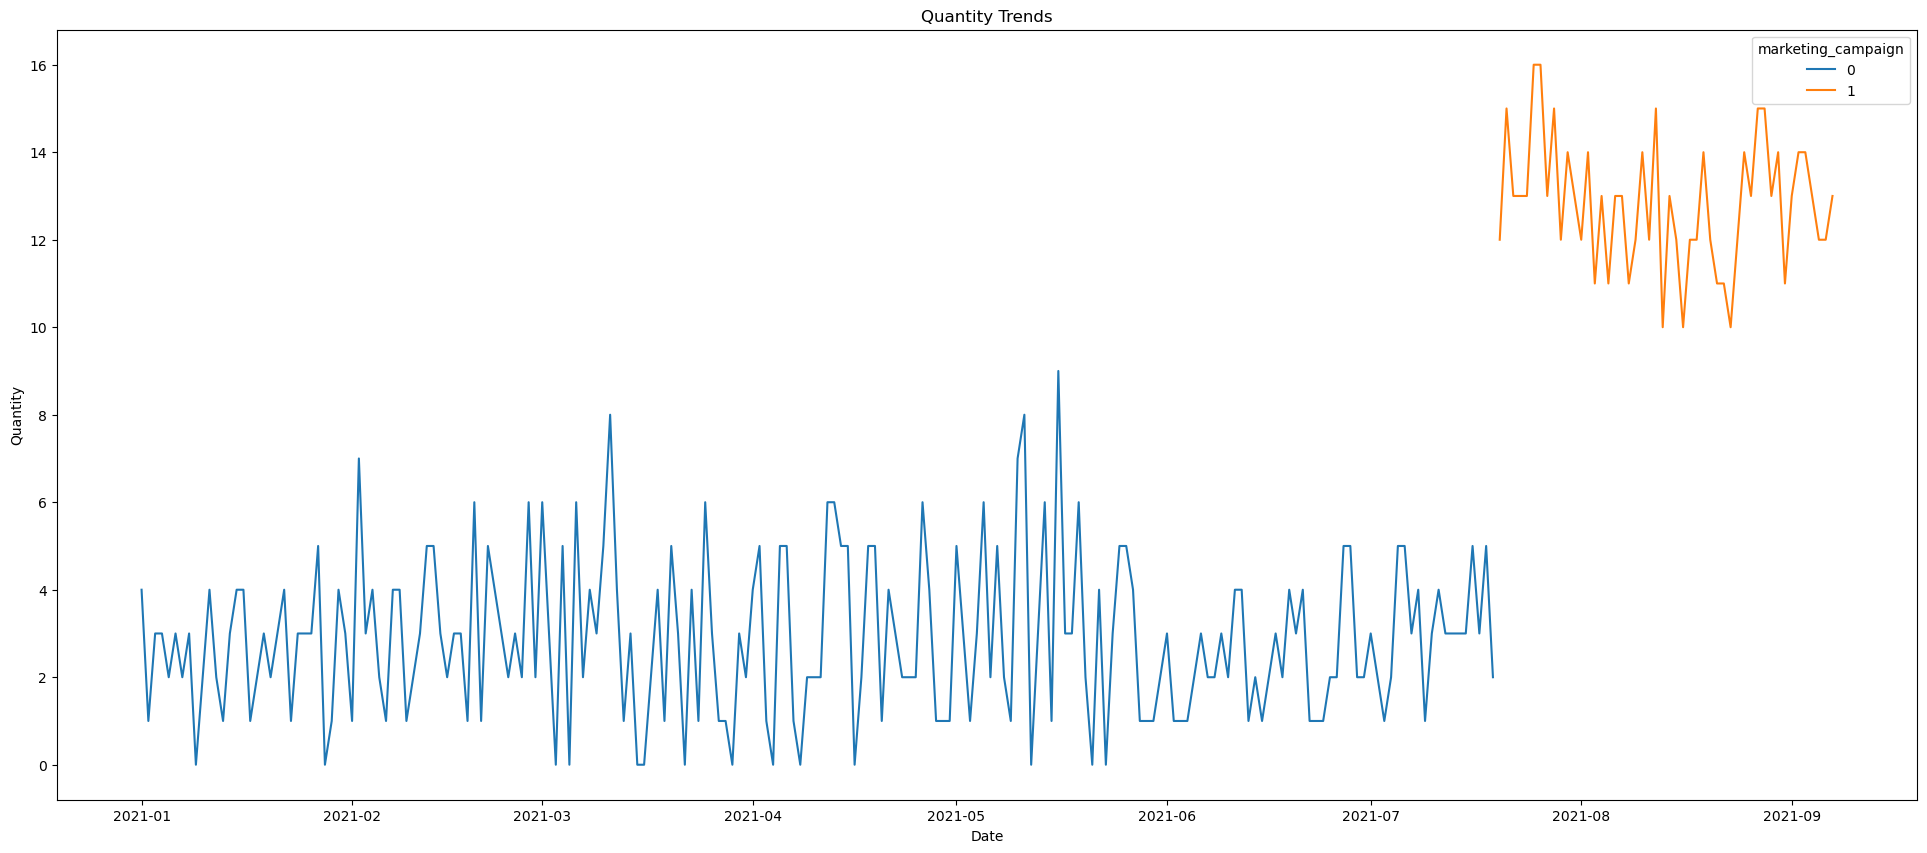

In [20]:
#quantity by date trends
sns.lineplot(data = df, x = 'date', y = 'quantity', hue = 'marketing_campaign' )
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Trends')
plt.show()


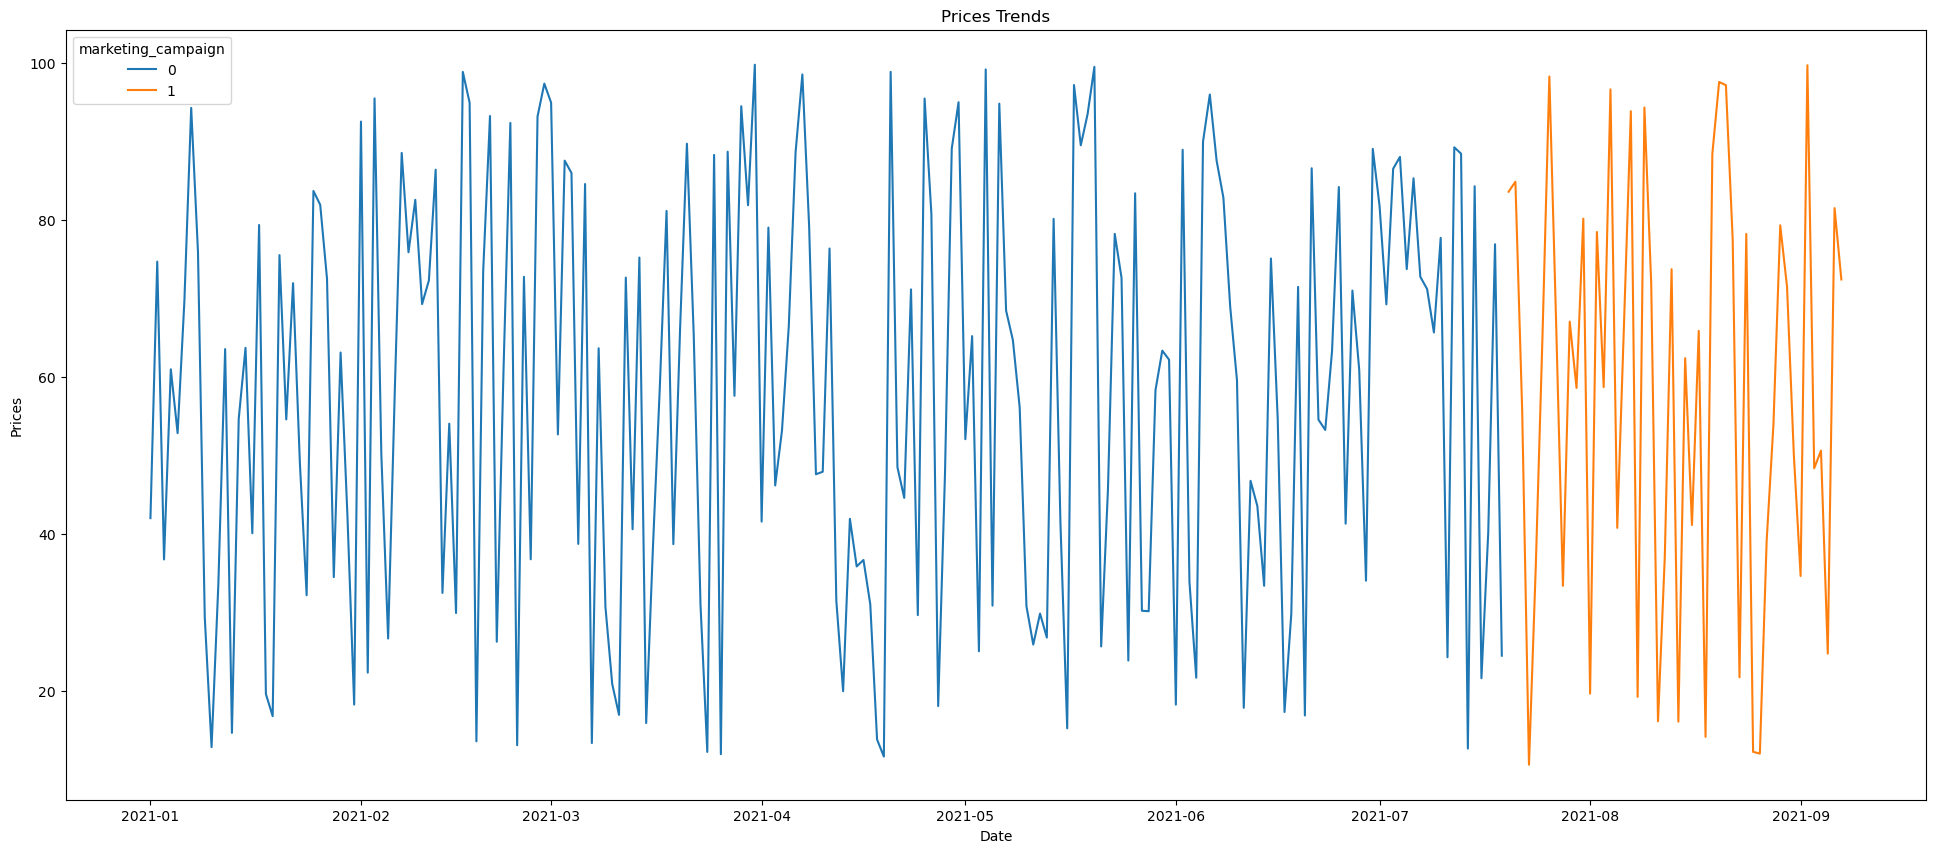

In [21]:
#prices by date trends
sns.lineplot(data = df, x = 'date', y = 'unit_price', hue = 'marketing_campaign' )
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Prices Trends')
plt.show()

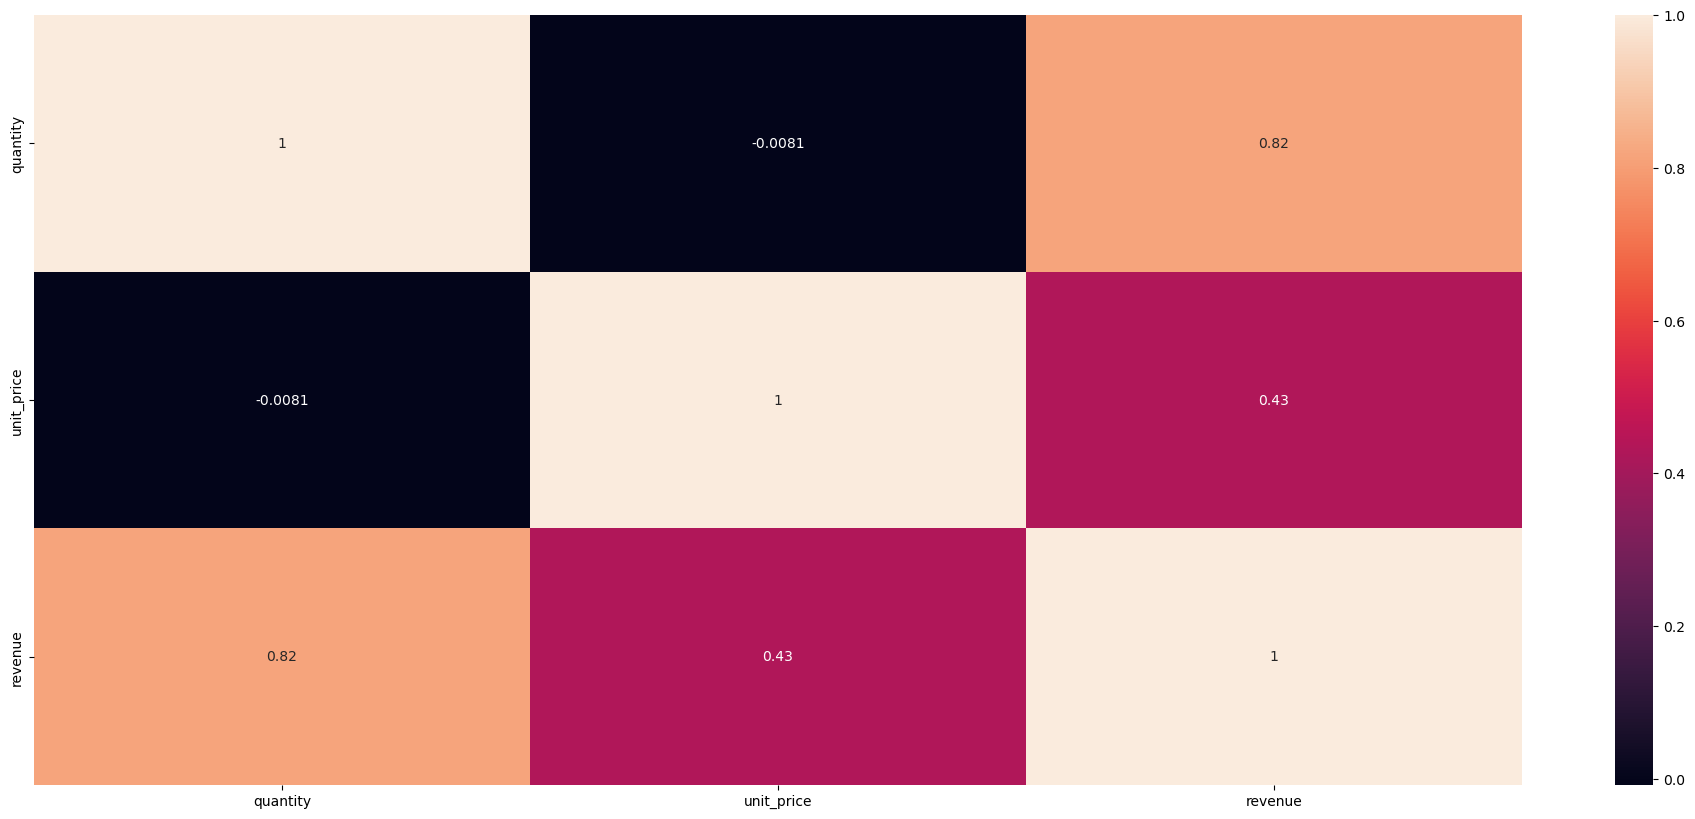

In [22]:
#correlation plot
columns = ['quantity', 'unit_price', 'revenue']
sns.heatmap(df[columns].corr(), annot = True);

In [23]:
df.head()

,date,quantity,unit_price,revenue,marketing_campaign
0,2021-01-01,4,42.01,168.04,0
1,2021-01-02,1,74.71,74.71,0
2,2021-01-03,3,36.74,110.22,0
3,2021-01-04,3,60.98,182.94,0
4,2021-01-05,2,52.84,105.68,0


In [24]:
df.tail()

,date,quantity,unit_price,revenue,marketing_campaign
245,2021-09-03,14,48.36,677.04,1
246,2021-09-04,13,50.62,658.06,1
247,2021-09-05,12,24.73,296.76,1
248,2021-09-06,12,81.53,978.36,1
249,2021-09-07,13,72.43,941.59,1


In [25]:
#setting index
df = df[['date','revenue', 'quantity', 'unit_price','marketing_campaign']].set_index('date')
df.head()

,revenue,quantity,unit_price,marketing_campaign
date,,,,
2021-01-01,168.04,4,42.01,0
2021-01-02,74.71,1,74.71,0
2021-01-03,110.22,3,36.74,0
2021-01-04,182.94,3,60.98,0
2021-01-05,105.68,2,52.84,0


In [26]:
df.info()
print(df['marketing_campaign'].unique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-01-01 to 2021-09-07
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenue             250 non-null    float64
 1   quantity            250 non-null    int64  
 2   unit_price          250 non-null    float64
 3   marketing_campaign  250 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.8 KB
[0 1]


## **Causal Impact Analysis**

In [28]:
# Preintervention period
pre_period = ['2021-01-01', '2021-07-19']
#Post-intervention period
post_period =  ['2021-07-20', '2021-09-07']
 

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    747.95             37397.29
Prediction (s.d.)         675.05 (11.2)      33752.63 (559.9)
95% CI                    [653.04, 696.94]   [32652.15, 34846.92]

Absolute effect (s.d.)    72.89 (11.2)       3644.66 (559.9)
95% CI                    [51.01, 94.9]      [2550.37, 4745.14]

Relative effect (s.d.)    10.8% (1.66%)      10.8% (1.66%)
95% CI                    [7.56%, 14.06%]    [7.56%, 14.06%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))



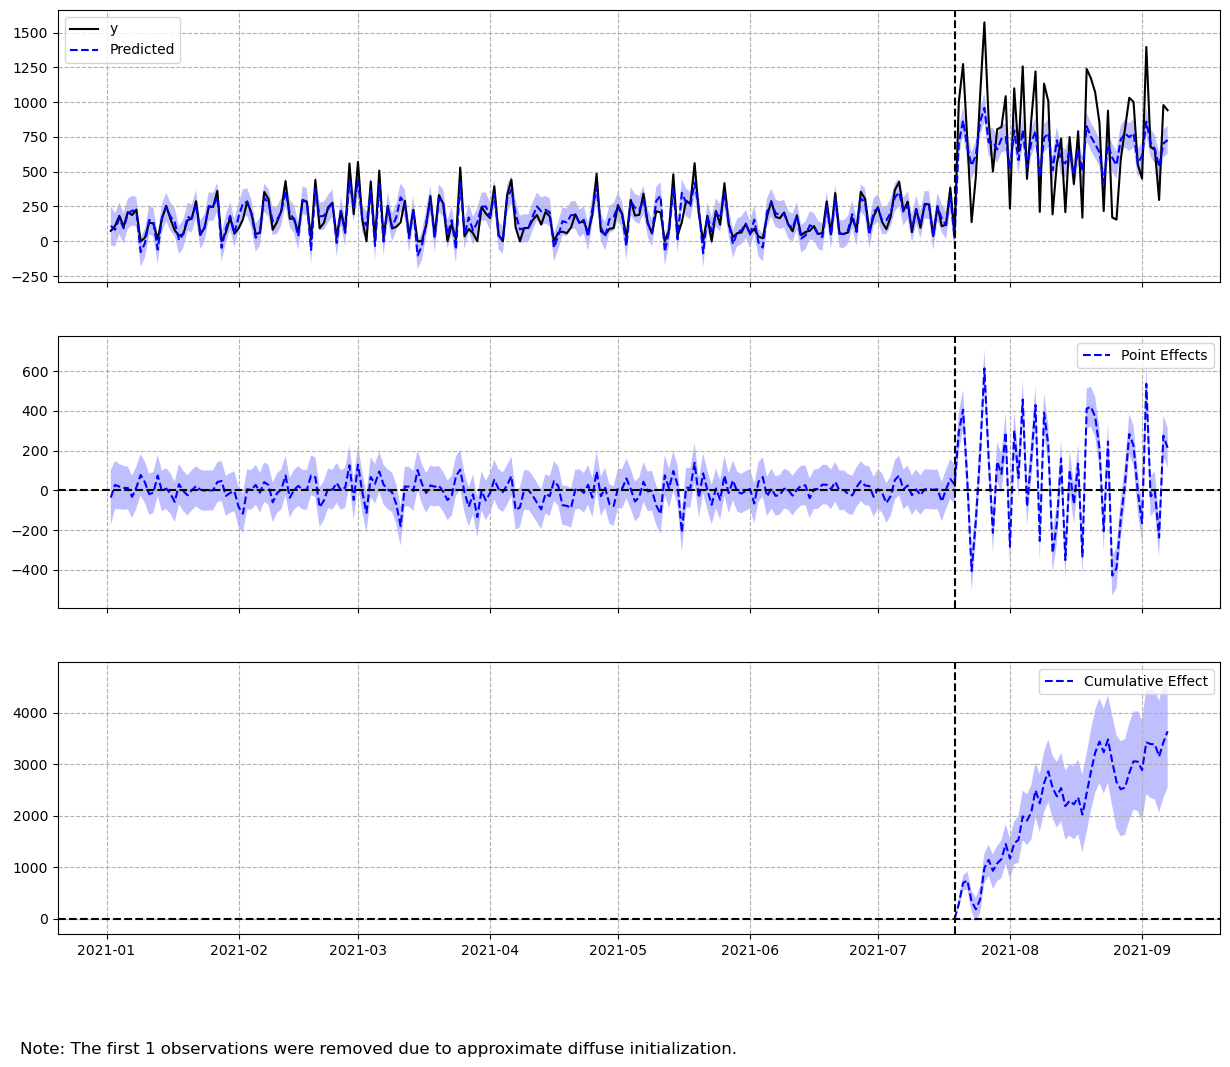


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 747.95. By contrast, in the absence of an
intervention, we would have expected an average response of 675.05.
The 95% interval of this counterfactual prediction is [653.04, 696.94].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 72.89 with a 95% interval of
[51.01, 94.9]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 37397.29.
By contrast, had the intervention not taken place, we would have expected
a sum of 33752.63. The 95% interval of this prediction is [32652.15, 34846.92].


The above results are given in terms of absolute numbers. In relative
terms, the res

In [29]:
# Instantiate and run the model
impact = CausalImpact(df[['revenue', 'quantity', 'unit_price']], pre_period, post_period)


print(impact.summary())
print()
impact.plot()
print()
print(impact.summary('report'))
